In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
import seaborn as sns; sns.set()

In [58]:
environments = ["CartPole-v0", "MountainCar-v0", "LunarLander-v2"] #, "Taxi-v2"
model_types = ["Reinforce", "Advantage", "Q"]

result_dict_all = {e:{} for e in environments}
for environment in environments:
    result_dict_all[environment] = {m:{} for m in model_types}
    for model_type in model_types:
        if model_type == "Reinforce":
            n_steps = ["Monte Carlo"]
        else:
            n_steps = ["1", "2", "4", "8"]
        for n_step in n_steps:
#             print("-----------------------------")
#             print(environment, model_type, n_step)

            # PLOT
            filename = "Results_Claartje/numpy/{}_n_step{}_{}.pickle".format(environment, n_step, model_type)

            with open(filename, 'rb') as handle:
                result_dict = pickle.load(handle)
                result_dict_all[environment][model_type][n_step] = result_dict

-----------------------------
CartPole-v0 Reinforce Monte Carlo
-----------------------------
CartPole-v0 Advantage 1
-----------------------------
CartPole-v0 Advantage 2
-----------------------------
CartPole-v0 Advantage 4
-----------------------------
CartPole-v0 Advantage 8
-----------------------------
CartPole-v0 Q 1
-----------------------------
CartPole-v0 Q 2
-----------------------------
CartPole-v0 Q 4
-----------------------------
CartPole-v0 Q 8
-----------------------------
MountainCar-v0 Reinforce Monte Carlo
-----------------------------
MountainCar-v0 Advantage 1
-----------------------------
MountainCar-v0 Advantage 2
-----------------------------
MountainCar-v0 Advantage 4
-----------------------------
MountainCar-v0 Advantage 8
-----------------------------
MountainCar-v0 Q 1
-----------------------------
MountainCar-v0 Q 2
-----------------------------
MountainCar-v0 Q 4
-----------------------------
MountainCar-v0 Q 8
-----------------------------
LunarLander-v2 

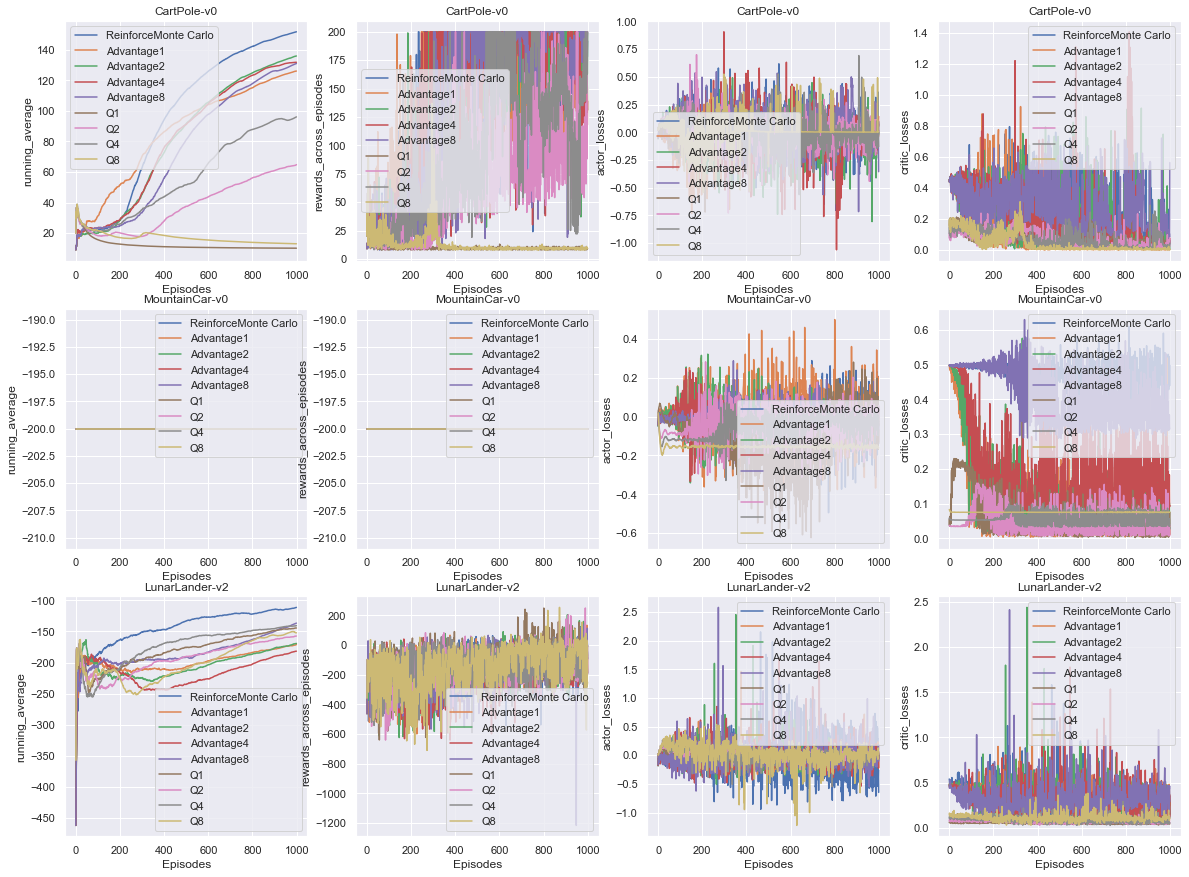

In [70]:
metrics = ['running_average', 'rewards_across_episodes', 'actor_losses', 'critic_losses']
fig, axs = plt.subplots(3, 4, figsize=(20, 15)) # 3 environments, 4 metrics
for row, environment in enumerate(environments):
    for model_type in model_types:
        if model_type == "Reinforce":
            n_steps = ["Monte Carlo"]
        else:
            n_steps = ["1", "2", "4", "8"]
        for n_step in n_steps:
            result_dict = result_dict_all[environment][model_type][n_step]
            for col, metric in enumerate(metrics):
                axs[row, col].set_title(environment)
                axs[row, col].set_ylabel(metric)
                axs[row, col].set_xlabel('Episodes')
                axs[row, col].plot(result_dict[metric], label=model_type + str(n_step))
                axs[row, col].legend()
plt.show()